## Preparación del entorno

In [1]:
%matplotlib inline
import numpy as np

import sklearn

import pandas as pd

Si el entorno está correctamente instalado, las líneas de código anteriores deben importar los paquetes sin ningún error.

Nota: para el resto de las preguntas y soluciones de código, puede ingresar más celdas si lo considera necesario.


## Carga y estudio de datos

Cargue los datos desde el archivo *adult_data.csv*. Para esto puede utilizar la librería *pandas* con su función *read_csv*.

In [2]:
df = pd.read_csv('adult_data.csv')

Imprima los nombres de las columnas (atributos), e investigue la documentación para entender que significa cada uno de ellos.

In [3]:
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'sex',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country',
       u'income'],
      dtype='object')

**PREGUNTA: A continuación realice algunas conjeturas de cuáles pueden llegar a ser los atributos de mayor utilidad para predecir el nivel de ingresos (income) de una persona.**

**RESPUESTA:**

In [4]:
capital-gain
capital-loss
education
occupation

NameError: name 'capital' is not defined

## Extracción de atributos

Separar la columna **income** en un array **y** que será utilizada como atributo clase:

In [5]:
y = df.income

Eliminar la columna **fnlwgt** ya que no aporta a la solución del problema. También eliminar la columna **education-num** ya que duplica la información de la columna 'education'. Por último, eliminar la columna **income** ya que es la columna que contiene la clase que se pretende predecir:

In [6]:
del df['fnlwgt']
del df['education-num']
del df['income']

Los atributos cuyos valores son categorías ('workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'), deben de transformarse a valores numéricos para poder ser utilizados como entradas en los modelos de scikit-learn.

**PREGUNTA: Por qué no es apropiado transformar un atributo de categoría en simples índices numéricos?**

**RESPUESTA: Porque se generaría una relación de órden y magnitud que el algoritmo de aprendizaje puede tomar y no es real...**

Utilice las clases *LabelEncoder* y *OneHotEncoder* del paquete *preprocessing* de *sklearn* para transformar los atributos de categorías en atributos numéricos. Guarde los datos de entrada en una matriz **X**.

In [7]:
import sklearn.preprocessing

aTransformar = ['workclass', 'education', 'marital-status', 'sex','occupation', 'native-country', 'relationship', 'race']

le = sklearn.preprocessing.LabelEncoder()

for t in aTransformar:
    le.fit(df[t])
    df[t] = le.transform(df[t])
    
features = [df.columns.get_loc(f) for f in aTransformar]

ohe = sklearn.preprocessing.OneHotEncoder(categorical_features=features, sparse=False)
df = pd.DataFrame(data=ohe.fit_transform(df))
    
    


In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,39.0,2174.0,0.0,40.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,50.0,0.0,0.0,13.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,38.0,0.0,0.0,40.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,53.0,0.0,0.0,40.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,40.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,37.0,0.0,0.0,40.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,16.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,45.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,31.0,14084.0,0.0,50.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,42.0,5178.0,0.0,40.0


**PREGUNTA: Cuántos y cuáles son los nuevos atributos del dataset?**

**RESPUESTA:**

In [9]:
len(df.columns)

103

In [10]:
df.columns

RangeIndex(start=0, stop=103, step=1)

## Partición de datos

Para poder entrenar y testear un algoritmo de aprendizaje, es necesario primero particionar los datos en dos conjuntos disjuntos de entrenamiento y testeo. Separe aleatoriamente un 25% de los datos para testeo, llame a los atributos de entrada como **X_test** y al vector de salida esperado **y_test**. El 75% restante se utilizará para el entrenamiento, nombre a la matriz con los datos de entrada como **X_train** y al vector de salida correspondiente como **y_train**.
Para esto puede utilizar la función *train_test_split* del paquete *cross_validation* de *sklearn*:

In [11]:
import sklearn.cross_validation
X_train,X_test,y_train,y_test = sklearn.cross_validation.train_test_split(df,y, test_size=0.25)

C:\Users\bgarate.SOFT\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Examine el tamaño de las matrices y vectores generados:

In [12]:
len(X_train)

3750

In [13]:
len(y_train)

3750

In [14]:
len(X_test)

1250

In [15]:
len(y_test)

1250

## Entrenamiento

Ahora que tenemos particionados los datos en entrenamiento y testeo, podemos comenzar a entrenar los algoritmos.

Genere un modelo 'dt' entrenando un algoritmo de árboles de decisión (ver el paquete *tree* de *sklearn*) con el vector de entrada X_train y el vector de salida y_train. Utilice los valores por defecto:

In [16]:
import sklearn.tree as tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Genere un modelo 'nb' entrenando un algoritmo de Naive Bayes (ver el paquete *naive_bayes* de *sklearn*) con el vector de entrada X_train y el vector de salida y_train. Utilice los valores por defecto:

In [17]:
import sklearn.naive_bayes as naive_bayes


nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None)

Genere un modelo 'svc' entrenando un algoritmo de Support Vector Machines (ver el paquete *svm* de *sklearn*) con el vector de entrada X_train y el vector de salida y_train. Utilice los valores por defecto:

In [18]:
import sklearn.svm as svm

svc = svm.SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Testing

Luego de tener los modelos entrenados, podemos medir qué tan bien funcionan los modelos (su capacidad de predicción) utlizando medidas standard como accuracy, precision, recall y medida-f.

**PREGUNTA: De la definición de cada una de las medidas de perfomance (accuracy, precision, recall y medida-f)**

**RESPUESTA:**

In [19]:
accuracy:

SyntaxError: invalid syntax (<ipython-input-19-6281de5ff38d>, line 1)

Implemente una función 'imprimir_performance' que dado un vector de entrada 'X', un vector de salida 'y', y un clasificador 'clf':
- Realice la predicción para el vector de entrada X.
- Imprima la medida de accuracy.
- Imprima precision, recall y medida f de cada clase.
- Imprima la matriz de confusión.

Para esto puede utilizar el paquete *metrics* de *sklearn*.

In [23]:
import sklearn.metrics as metrics
import numpy as np

def imprimir_performance(X, y, clf):
    # predicciones = np.array([clf.predict(np.array(x).reshape(1,-1)) for x in X.values])
    predicciones = clf.predict(np.array(X))
        
    print("Accuracy: " + str(metrics.accuracy_score(y, predicciones)))
    
    for l in [' <=50K', ' >50K']:
        print("Label " + l)
        print("   Precision: " + str(metrics.precision_score(y, predicciones, pos_label=l)))
        print("   Recall: " + str(metrics.recall_score(y, predicciones, pos_label=l)))
        print("   Medida-f: " + str(metrics.f1_score(y, predicciones, pos_label=l)))
        
    print("Confussion matrix:\n" + str(metrics.confusion_matrix(y, predicciones)))

Utilice la función **imprimir_performance** para imprimir las medidas de performance para el clasificador **dt** basado en árboles de decisión:

In [24]:
imprimir_performance(X_test, y_test, dt)

Accuracy: 0.808
Label  <=50K
   Precision: 0.873404255319
   Recall: 0.871549893843
   Medida-f: 0.872476089267
Label  >50K
   Precision: 0.609677419355
   Recall: 0.613636363636
   Medida-f: 0.611650485437
Confussion matrix:
[[821 121]
 [119 189]]


Utilice la función **imprimir_performance** para imprimir las medidas de performance para el clasificador **nb** basado en Naive Bayes:

In [25]:
imprimir_performance(X_test, y_test, nb)

Accuracy: 0.7912
Label  <=50K
   Precision: 0.927227101631
   Recall: 0.784501061571
   Medida-f: 0.849913743531
Label  >50K
   Precision: 0.551876379691
   Recall: 0.811688311688
   Medida-f: 0.65703022339
Confussion matrix:
[[739 203]
 [ 58 250]]


Utilice la función **imprimir_performance** para imprimir las medidas de performance para el clasificador **svc** basado en Support Vector Machines:

In [26]:
imprimir_performance(X_test, y_test, svc)

Accuracy: 0.832
Label  <=50K
   Precision: 0.825044404973
   Recall: 0.986199575372
   Medida-f: 0.898452611219
Label  >50K
   Precision: 0.895161290323
   Recall: 0.36038961039
   Medida-f: 0.513888888889
Confussion matrix:
[[929  13]
 [197 111]]


**PREGUNTA: Realice un breve análisis de los resultados obtenidos.**

**RESPUESTA:**

## Validación cruzada

Entrene y mida la perfomance de los calsifificadores anteriores, pero ahora utilizando el algoritmo de validación cruzada (cross validation) tomando 5 particiones. Imprima el promedio de accuracy obtenido para cada modelo:

In [27]:
import sklearn.model_selection as ms

cross = ms.KFold(n_splits=5)

clfs = [("DT", tree.DecisionTreeClassifier()), ("NB", naive_bayes.GaussianNB()), ("SVC",  svm.SVC())]

performances = {}

for nombre, clf in clfs:
    
    sumAcc = 0
    
    for train, test in cross.split(X_train, y_train):
           
        clf.fit(X_train.values[train],y_train.values[train])
        predicciones = clf.predict(np.array(X_train.values[test]))
        sumAcc += metrics.accuracy_score(y_train.values[test], predicciones)
    
    performances[nombre] = sumAcc/5
    
    print("Accuracy " + nombre + ": " + str(sumAcc/5))
    

Accuracy DT: 0.7952
Accuracy NB: 0.785066666667
Accuracy SVC: 0.825866666667


**PREGUNTA: Describa brevemente cuáles son las ventajas de utilizar validación cruzada en vez de realizar una único esquema de partición como se hizo al principio.**

**RESPUESTA:**

## Mejorando los resultados

Existen varias técnicas que pueden ser utilizadas para mejorar los resultados de nuestros modelos. A continuación utilizaremos técnias de **selección de atributos** y de **ajuste de hiperparámetros**.

## Selección de atributos

En nuestros entrenamientos hemos utilizado todos los atributos disponibles para entrenar nuestros modelos. Pero no siempre esto lleva a los mejores resultados, de hecho muchas veces, trabajar con un conjunto reducido de atributos devuelve mejores resultados.

**PREGUNTA: Investigue de qué se trata la técnica de selección de atributos (feature selection) y argumente brevemente por qué puede mejorar la performance de un algoritmo de aprendizaje automático.**

**RESPUESTA:**

Utilizando el paquete *feature_selection* de *sklearn*, seleccione e imprima la lista de los 20 mejores atributos según la medida estadística chi^2:

In [28]:
import sklearn.feature_selection as fs

selector = fs.SelectKBest(fs.chi2,k=20)
selector.fit_transform(X_train, y_train).astype(np.int32)

array([[   0,    0,    0, ...,    0,    0,   40],
       [   0,    0,    0, ...,    0, 1876,   50],
       [   0,    0,    0, ...,    0,    0,   40],
       ..., 
       [   0,    0,    0, ...,    0,    0,   40],
       [   0,    1,    0, ...,    0,    0,   70],
       [   0,    0,    0, ...,    0,    0,   43]])

Intente obtener la lista de los mejores N atributos, donde N sea la cantidad mínima posible de atributos que mantenga o mejore las medidas de performance obtenidas con validación cruzada:

DT
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False]
NB
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 

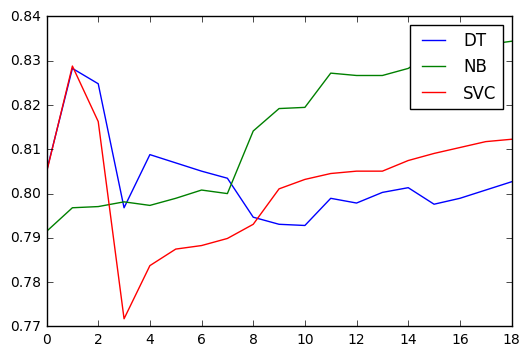

In [29]:
import matplotlib
import matplotlib.pyplot as plt

def realizarCV(clf, X, y):
    
    cross = ms.KFold(n_splits=5)
    sumAcc = 0
    
    for train, test in cross.split(X, y):
        
        clf.fit(X[train],y.values[train])
        predicciones = clf.predict(np.array(X[test]))
        sumAcc += metrics.accuracy_score(y.values[test], predicciones)
    
    return sumAcc / 5

plt.clf()
selectores = {}

for nombre, clf in clfs:

    performanceTarget = realizarCV(clf, X_train.values, y_train)
    nuevasPerformances = []
    mejoresAtributos = []
    
    for n in xrange(1,20):
        kSelector = fs.SelectKBest(fs.chi2,k=n)
        X_filtered = kSelector.fit_transform(X_train, y_train).astype(np.int32)
        res = realizarCV(clf, X_filtered, y_train)
        
        if len(mejoresAtributos) == 0 and res > performances[nombre]:
            mejoresAtributos = kSelector.get_support()
            selectores[nombre] = kSelector

        nuevasPerformances.append(res)
    
    print(nombre)
    print(mejoresAtributos)
    plt.plot(nuevasPerformances, label=nombre)
    
    
plt.legend()
plt.show()

Con el conjunto de atributos obtenido, entrene los clasificadores nuevamente y verifique que las medidas de precision, recall mejoran en general:

In [30]:
for nombre, clf in clfs:
    X_selected = selectores[nombre].transform(X_train)
    X_test_selected = selectores[nombre].transform(X_test)
    clf.fit(X_selected,y_train)
    imprimir_performance(X_test_selected, y_test,clf)

Accuracy: 0.8024
Label  <=50K
   Precision: 0.792262405383
   Recall: 1.0
   Medida-f: 0.884091975598
Label  >50K
   Precision: 1.0
   Recall: 0.198051948052
   Medida-f: 0.330623306233
Confussion matrix:
[[942   0]
 [247  61]]
Accuracy: 0.7896
Label  <=50K
   Precision: 0.788936170213
   Recall: 0.984076433121
   Medida-f: 0.875767595654
Label  >50K
   Precision: 0.8
   Recall: 0.194805194805
   Medida-f: 0.313315926893
Confussion matrix:
[[927  15]
 [248  60]]
Accuracy: 0.8264
Label  <=50K
   Precision: 0.812769628991
   Recall: 1.0
   Medida-f: 0.896715849595
Label  >50K
   Precision: 1.0
   Recall: 0.295454545455
   Medida-f: 0.456140350877
Confussion matrix:
[[942   0]
 [217  91]]


## Ajuste de hiperparámetros

Por lo general, cada algoritmo y modelo de aprendizaje automático posee parámetros configurables. Estos parámetros se los suele denominar 'hiperparámetros' del algoritmo, ya que son parámetros que el algoritmo no ajusta automáticamente, sino que son ajustados por el "usuario".

La correcta selección de estos hiperparámetros por lo general tiene una gran incidencia en la performance de los algoritmos.

**PREGUNTA: Para los modelos generados anteriormente (Árbol de decisión, Naive Bayes y Support Vector Machines), investigue en la documentación de scikit-learn cuáles son sus hiperparámetros y qué valores toman. A continuación liste y de una breve descripción de cada uno:**

**RESPUESTA:**


Pruebe diferentes configuraciones de hiperparámetros para los modelos anteriores de modo de mejorar los resultados de performance obtenidos mediante la función *imprimir_performance*.

Para esto puede realizarlo manualmente o buscar una estrategia más avanzada utilizando la clase *GridSearchCV* del paquete *grid_search* de *sklearn*. Esta clase permite definir una grilla de parámetros y posibles valores para luego entrenar el modelo con todas sus posibles combinaciones y devolver la configuración que retorna la mejor performance.

En caso de tener que combinar varios procesos de extracción y selección de atributos junto con un modelo de aprendizaje, se recomienda utilizar la clase *Pipeline* del paquete *pipeline* de *sklearn*.

Tener en cuenta que si la grilla es muy grande, el proceso puede requerir mucho tiempo de cómputo y memoria.

In [ ]:
import sklearn.grid_search as gs

params = {}
params["SVC"] = { 
    'C': [0.5,1,1.5],
    'kernel': ['linear', 'poly', 'rbf'],
}

params["DT"] = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random']
}
params["NB"] = {
    
}


for nombre, clf in clfs:
    print(nombre)
    gridSearch = gs.GridSearchCV(clf, params[nombre])
    a = gridSearch.fit(X_train, y_train)
    print(gridSearch)


C:\Users\bgarate.SOFT\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


DT
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
NB
GridSearchCV(cv=None, error_score='raise', estimator=GaussianNB(priors=None),
       fit_params={}, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
SVC


**PREGUNTAS:**
- **Cuáles son los valores de los hiperparámetros con los cuales se obtienen los mejores resultados de performance?**
- **Con qué modelo se obtienen los mejores resultados de precision y recall?**

**RESPUESTA:**

**PREGUNTA: Escriba las conclusiones generales que haya obtenido de la tarea.**

**RESPUESTA:**

# Clasificación de Imágenes

En esta sección trabajaremos con clasificación de imágenes. Cada instancia a clasificar es una imagen con un dígito escrito a mano. El objetivo es detectar el dígito correspondiente a cada imagen. Para eso utilizaremos un dataset de *sklearn.datasets* que contiene imágenes de dígitos escritos a mano etiquetadas. Cada imagen se representa como un vector de pixeles.

Utilizar la función *load_digits* para importar los datos de dígitos escritos a mano. Inspeccionar su contenido (data, target, images y target_names), renderizar el dígito de la primera instancia del dataset:

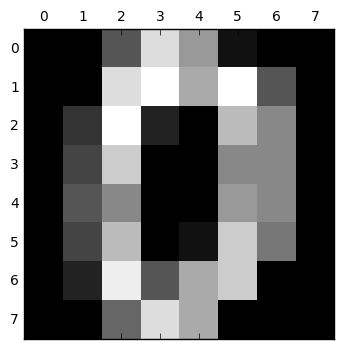

In [16]:
import sklearn.datasets as datasets

digits = datasets.load_digits()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

Particionar los datos en dos conjuntos dijuntos de entrenamiento y testeo:

In [19]:
xDigitsTrain,xDigitsTest,yDigitsTrain,yDigitsTest = sklearn.cross_validation.train_test_split(digits.data,digits.target,
                                                                                              test_size =0.5)
len(digits.images)

1797

Extraer atributos de las imágenes para ser utilizados en el modelo de clasificación. Para esto, investigar las clases de Principal Component Analysis (PCA) del paquete sklearn.decomposition:

In [20]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=16)
xDigitsTrain = pca.fit_transform(xDigitsTrain,yDigitsTrain)
xDigitsTest = pca.transform(xDigitsTest)


**PREGUNTA: Explique el método de extracción de atributos y justifique su elección.**

**RESPUESTA:**

Elija dos algoritmos de aprendizaje y entrene e intente obtener los mejores modelos de clasificación posibles:

In [21]:
from sklearn import svm as svm
from sklearn import neural_network


svc = svm.SVC(gamma=0.001)
svc.fit(xDigitsTrain, yDigitsTrain)
predictSvc = svc.predict(xDigitsTest)

nn = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20,20), max_iter=80000,alpha=0.001)
nn.fit(xDigitsTrain,yDigitsTrain)




MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=80000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Imprima los mejores resultados de precision, recall y accuracy para los algoritmos seleccionados:

In [28]:
def imprimir_performance(X, y, clf):
    # predicciones = np.array([clf.predict(np.array(x).reshape(1,-1)) for x in X.values])
    predicciones = clf.predict(X)
        
    print("Accuracy: " + str(metrics.accuracy_score(y, predicciones)))
    

    for l in range(10):
        print("Label " + str(l))
        print("   Precision: " + str(metrics.precision_score(y, predicciones, average = 'micro', labels=[l])))
        print("   Recall: " + str(metrics.recall_score(y, predicciones, average = 'micro', labels=[l])))
        print("   Medida-f: " + str(metrics.f1_score(y, predicciones, average = 'micro', labels=[l])))
        
    print("Confussion matrix:\n" + str(metrics.confusion_matrix(y, predicciones, )))
    
    
imprimir_performance(xDigitsTest,yDigitsTest,svc)
imprimir_performance(xDigitsTest,yDigitsTest,nn)

Accuracy: 0.991101223582
Label 0
   Precision: 1.0
   Recall: 1.0
   Medida-f: 1.0
Label 1
   Precision: 0.98
   Recall: 1.0
   Medida-f: 0.989898989899
Label 2
   Precision: 1.0
   Recall: 1.0
   Medida-f: 1.0
Label 3
   Precision: 1.0
   Recall: 0.988372093023
   Medida-f: 0.994152046784
Label 4
   Precision: 0.988764044944
   Recall: 0.977777777778
   Medida-f: 0.983240223464
Label 5
   Precision: 0.977011494253
   Recall: 0.988372093023
   Medida-f: 0.982658959538
Label 6
   Precision: 1.0
   Recall: 1.0
   Medida-f: 1.0
Label 7
   Precision: 0.97619047619
   Recall: 0.987951807229
   Medida-f: 0.982035928144
Label 8
   Precision: 1.0
   Recall: 0.987341772152
   Medida-f: 0.993630573248
Label 9
   Precision: 0.989130434783
   Recall: 0.978494623656
   Medida-f: 0.983783783784
Confussion matrix:
[[101   0   0   0   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0   0   0   0]
 [  0   0  97   0   0   0   0   0   0   0]
 [  0   0   0  85   0   1   0   0   0   0]
 [  0   1   0   0

**PREGUNTA: Analice los resultados obtenidos.**

**RESPUESTA:**